**Group Name:** Group 117 <br>
**Student 1: Name:** Varun Vivian Pereira, **Student ID:** s3842244 <br>
**Student 2: Name:** Rohan Dwijesh Poorun, **Student ID:** s3843078 <br>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
pd.set_option('display.max_columns', None) 

<h1><font style="color:#0086b3;font-size:35pt;font-family:calibri"> Predicting Cancer Mortality Rates for US Counties </font></h1>

<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Table of Contents </font></h2>

- [Source and Description](#subhead1)
- [Goals and Objectives](#subhead2)
- [Data Preparation](#subhead3)
- [Data Exploration](#subhead4)
- [Statistical Modeling & Performance Evaluation](#subhead5)
- [Summary & Conclusions](#subhead6)

<a id="subhead1"></a>
<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Source and Description </font></h2>

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Dataframe Source and Acknowledgements </font></h3>

The dataframe, 'OLS Regression Challenge', which can be found on [data.world](https://data.world/nrippner/ols-regression-challenge) (Rippner, 2020) contains the aggregation of data from a number of sources. The main sources which formed the forementioned dataset include the American Community Survey [(census.gov)](https://www.census.gov/), [clinicaltrails.gov](https://clinicaltrials.gov/) and [cancer.gov](https://www.cancer.gov/). The data preparation to form the original dataset of which this particular study is based on can be viewed [here](https://data.world/nrippner/cancer-trials). This data has since been further refined by the authors of this particular study to be suit the research requirements.


Acknowledgement to the exceptional tutors in the Intro to Analytics course at RMIT, for which this report was structured upon. The main resource used can be found [here](https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/) 
(Aksakalli et al., 2020)

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Dataframe Description </font></h3>

The dataframe provides relevant variables that could be used to build a multivariate ordinary least squares multiple regression model to predict the target feature. The dataset includes a wide range of variables which are related to the target variable, which aim to see whether there is a correlation between the death rate of cancer patients within different counties with similar of differing properties. These properties include age, gender, income, poverty and more. Therefore, the dataset demonstrates whether these factors impact the likelihood of an individual with cancer surviving in their particular county.


<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Dataframe's Target Feature </font></h3>

Our target feature is TARGET_deathRate, which is a continous numerical feature which shows cancer mortalities proportion of a county measured by the number of deaths per capita (100,000). Hence, our project is on a multiple regression problem. More information is shown below.
<br><br>


<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Dataframe All Features </font></h3>

| Feature Name            | Data Type             | Units          | Description                                                                                                          |
|-------------------------|-----------------------|----------------|----------------------------------------------------------------------------------------------------------------------|
| avgAnnCount             | numerical (Discrete)  | people         | cancer rate                                                                                                          |
| avgDeathsPerYear        | numerical (Discrete)  | people         | cancer deaths                                                                                                        |
| TARGET_deathRate        | numerical (Continous) | people/100,000 | proportion of cancer deaths                                                                                          |
| incidenceRate           | numerical (Continous) | people/100,000 | proportion of cancer cases                                                                                           |
| medIncome               | numerical (Discrete)  | USD            | median income per county                                                                                             |
| popEst2015              | numerical (Discrete)  | people         | county population in 2015                                                                                            |
| povertyPercent          | numerical (Continous) | percent        | percent of county population living in poverty                                                                       |
| studyPerCap             | numerical (Continous) | trials/100,000 | proportion of cancer trials                                                                                          |
| binnedInc               | numerical (Continous) | USD            | Median income per capita binned by decile                                                                            |
| MedianAge               | numerical (Continous) | years          | median age of county's citizens                                                                                      |
| MedianAgeMale           | numerical (Continous) | years          | median age of county's male citizens                                                                                 |
| MedianAgeFemale         | numerical (Continous) | years          | median age of county's female citizens                                                                               |
| Geography               | categorical (nominal) | unknown        | county name                                                                                                          |
| AvgHouseholdSize        | numerical (Continous) | people         | mean household size of county                                                                                        |
| PercentMarried          | numerical (Continous) | percent        | Percentage of residents within the county who are married                                                            |
| PctNoHS18_24            | numerical (Continous) | percent        | Percent of 18-24 year old county residents whose highest education attained is: less than high school                |
| PctHS18_24              | numerical (Continous) | percent        | Percent of 18-24 year old county residents whose highest education attained is: high school diploma                  |
| PctSomeCol18_24         | numerical (Continous) | percent        | Percent of 18-24 year old county residents whose highest education attained is: some college                         |
| PctBachDeg18_24         | numerical (Continous) | percent        | Percent of 18-24 year old county residents whose highest education attained is: bachelors degree                     |
| PctHS25_Over            | numerical (Continous) | percent        | Percent of 25+ year old county residents whose highest education attained is: high school diploma                    |
| PctBachDeg25_Over       | numerical (Continous) | percent        | Percent of 25+ year old county residents whose highest education attained is: bachelors degree                       |
| PctEmployed16_Over      | numerical (Continous) | percent        | Percent of 16+ year old county residents who are employed                                                            |
| PctUnemployed16_Over    | numerical (Continous) | percent        | Percent of 16+ year old county residents who are unemployed                                                          |
| PctPrivateCoverage      | numerical (Continous) | percent        | Percent of residents who have private health coverage in the county                                                  |
| PctPrivateCoverageAlone | numerical (Continous) | percent        | Percent of residents who have private health coverage alone (no public assistance) in the county                     |
| PctEmpPrivCoverage      | numerical (Continous) | percent        | Percent of residents who have employee provided private health coverage in the county                                |
| PctPublicCoverage       | numerical (Continous) | percent        | Percent of residents who have government provided private health coverage in the county                              |
| PctPublicCoverageAlone  | numerical (Continous) | percent        | Percent of residents who have government provided private health coverage alone (no public assistance) in the county |
| PctWhite                | numerical (Continous) | percent        | Percent of residents who identify as white in the county                                                             |
| PctBlack                | numerical (Continous) | percent        | Percent of residents who identify as black in the county                                                             |
| PctAsian                | numerical (Continous) | percent        | Percent of residents who identify as asian in the county                                                             |
| PctOtherRace            | numerical (Continous) | percent        | Percent of residents who identify as a race other than white, black or asian in the county                           |
| PctMarriedHouseholds    | numerical (Continous) | percent        | percent of households that contain married citizens                                                                  |
| BirthRate               | numerical (Continous) | births/woman   | live births per woman                                                                                                |


<a id="subhead2"></a>
<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Goals and Objectives </font></h2>

<h2><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Goal </font></h2>

Our goal is to determine if we can predict the cancer mortality rate of a US county within an acceptable margin of error, using multiple linear regression primarily with just the main affects.

<h2><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Objectives </font></h2>

Our goal can be achieved by comparing the relevant descriptive features/ response variables against each other in order to test if there is indeed a correlation between the response variable (dependent variable) and explanatory variables (independent variable) and to what extent. We can then compare multiple descriptive features to the target variable via multiple linear regression which gives a big picture result of how factors such as age, gender, income, race and more affect the mortality rate of cancer patients in the US. Therefore, we are able to construct a model which is able to predict cancer mortality rate/ death by the given data, such as the aforementioned features/ variables.

Our goal can be achieved by completing:
- Data Preparation for more accurate, relevant and clean data
- Data Exploration to visualise our data and draw valuable insights
- Statistical Modeling & Performance Evaluation to use multiple regression and predict our target feature
- Summary & Conclusions to determine if our goal and objectives has been achieved



<a id="subhead3"></a>
<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Data Preparation </font></h2>

In [2]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [3]:
# PLEASE NOTE: change 'Group117_Data-x.csv' file to 'Group117_Data.csv' as Canvas automatically adds numbers to end of name
# if submitted more than once.
# Accessing the dataframe stored in same location as Jupyter Notebook Workspace 
df = pd.read_csv('Group117_Data.csv',encoding='latin-1')
# round to 3 decimal places
df = df.round(3)
df.sample(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
833,157.0,64,202.5,500.4,39561,24186,21.2,82.692,"(37413.8, 40362.7]",41.5,41.1,42.0,"Sabine Parish, Louisiana",2.60,51.8,21.8,47.6,NaN,3.8,42.0,9.2,46.2,10.6,57.2,NaN,34.2,39.8,20.3,70.468,16.748,0.408,0.454,50.005,6.367
2452,158.0,63,181.7,460.0,34017,30779,33.9,0.000,"[22640, 34218.1]",34.6,32.6,36.6,"Sumter County, Georgia",2.58,37.6,17.8,28.8,NaN,4.7,31.4,9.3,46.5,14.4,49.3,36.1,29.7,45.7,31.3,42.575,51.662,1.349,2.374,38.832,6.813
483,23.0,13,205.3,436.0,45040,2968,10.8,0.000,"(42724.4, 45201]",52.8,51.8,54.0,"Nelson County, North Dakota",1.95,58.5,4.6,39.4,NaN,10.9,30.8,15.7,59.9,0.7,75.9,53.8,39.1,35.5,12.9,96.293,1.378,0.000,0.000,49.212,10.426
2135,192.0,69,163.2,442.5,54642,35663,11.0,56.081,"(54545.6, 61494.5]",45.0,44.3,46.0,"Dare County, North Carolina",2.32,54.9,15.8,29.5,NaN,25.7,24.4,20.2,64.9,6.4,65.4,NaN,35.7,31.2,15.3,90.405,2.234,0.485,3.732,51.506,4.646
1143,845.0,282,153.4,464.9,59377,183245,10.0,120.058,"(54545.6, 61494.5]",37.8,36.6,38.9,"Outagamie County, Wisconsin",2.51,55.0,12.8,32.5,NaN,8.7,34.2,19.7,68.1,3.9,78.5,66.6,60.9,25.5,13.5,90.519,1.115,3.206,1.803,53.904,4.724


<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Data Cleaning and Transformation </font></h3>

We first need to confirm if the data types of all the features matches what was documented earlier.

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.\n')
print(f"Data types are below where 'object' indicates categorical data, 'int64' indicates discrete numerical data, 'float64' indicates continuous numerical data: ")
df.dtypes

There are 3047 rows and 34 columns.

Data types are below where 'object' indicates categorical data, 'int64' indicates discrete numerical data, 'float64' indicates continuous numerical data: 


avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Checking for Missing Values </font></h3>

In [5]:
print(f"\nNumber of missing values for each feature:")
print(df.isnull().sum())


Number of missing values for each feature:
avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                    

It appears that 3 features contain missing values, for simplicity these rows are dropped.

In [6]:
df = df.dropna()
df = df.reset_index(drop=True)

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Checking for Outliers </font></h3>

Outliers can be defined as values more than 2 standard deviations from the mean.

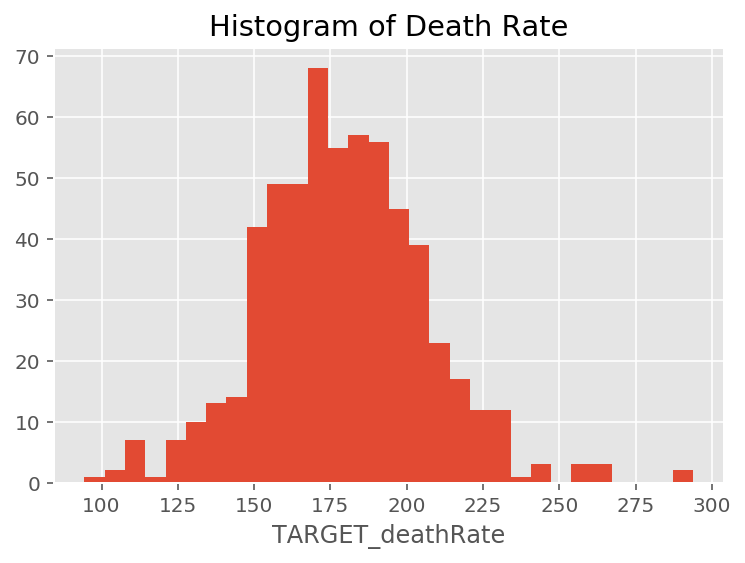

In [7]:
plt.hist(df['TARGET_deathRate'], bins = 30)
plt.xlabel('TARGET_deathRate')
plt.title('Histogram of Death Rate')
plt.show();

Since we do not have additional information, it is safer to remove the outliers. Let us remove these rows.

In [8]:
df = df.drop(df[(df['TARGET_deathRate'] > df['TARGET_deathRate'].quantile(0.954499))&(df['TARGET_deathRate'] < df['TARGET_deathRate'].quantile(0.045501))].index)
df = df.reset_index(drop=True)
df.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,173.0,70,161.3,411.6,48127,43269,18.6,23.111,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.229,0.969,2.246,3.741,45.373,4.333
1,427.0,202,194.8,430.4,44243,75882,17.1,342.637,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.745,0.783,1.161,1.363,51.022,4.604
2,57.0,26,144.4,350.1,49955,10321,12.5,0.000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104,0.270,0.666,0.492,54.027,6.797
3,146.0,71,183.6,404.0,40189,20848,17.8,0.000,"(37413.8, 40362.7]",51.7,50.8,52.5,"Pacific County, Washington",2.24,52.7,27.3,33.9,36.5,2.2,31.6,11.3,40.9,8.9,55.8,33.1,25.9,50.9,24.1,89.407,0.305,1.889,2.286,48.967,5.889
4,2265.0,901,171.0,440.7,50083,490945,16.3,462.374,"(48021.6, 51046.4]",37.2,35.7,38.7,"Spokane County, Washington",2.45,49.4,10.9,29.3,51.2,8.6,25.7,18.1,55.1,8.4,65.2,50.6,42.5,36.5,21.4,89.038,1.827,2.316,1.034,48.188,5.356


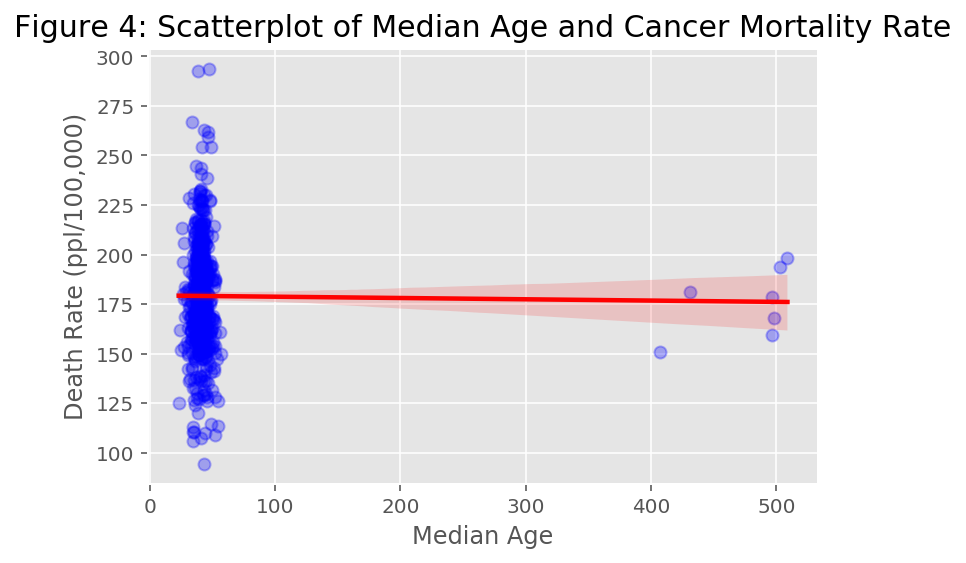

In [9]:
sns.regplot(df['MedianAge'], df['TARGET_deathRate'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.title('Figure 4: Scatterplot of Median Age and Cancer Mortality Rate', fontsize = 15)
plt.xlabel('Median Age')
plt.ylabel('Death Rate (ppl/100,000)')
plt.show();

In officially recorded history, there has never been a person older than 125 years of age. Hence, this will be the upper limit for median age. The putliers that are greater than 125 years in the scatterplot and are hence to be removed.

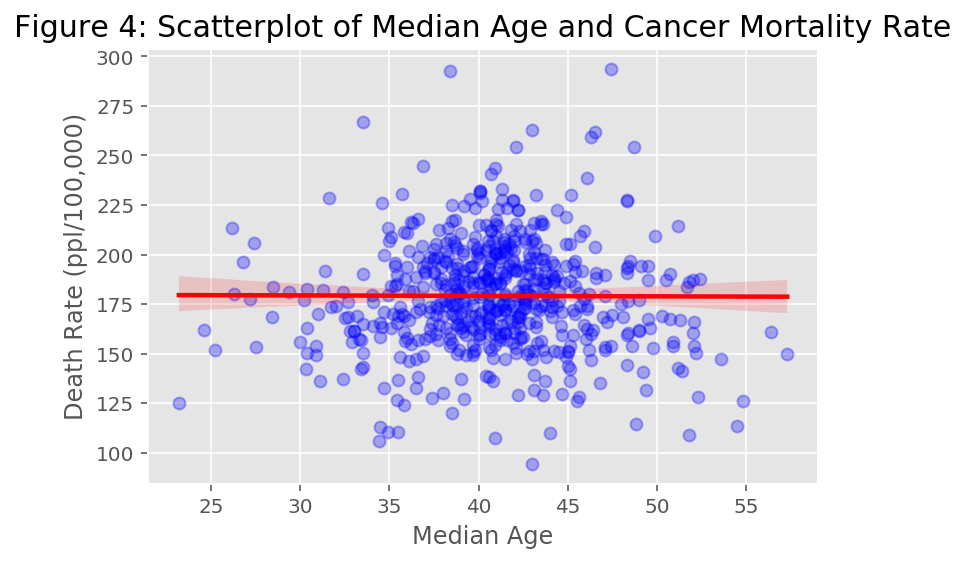

In [10]:
df = df.drop(df[df['MedianAge'] > 125].index)
df = df.reset_index(drop=True)
sns.regplot(df['MedianAge'], df['TARGET_deathRate'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.title('Figure 4: Scatterplot of Median Age and Cancer Mortality Rate', fontsize = 15)
plt.xlabel('Median Age')
plt.ylabel('Death Rate (ppl/100,000)')
plt.show();

**Note:** When graphing and testing each feature, no negative values (errors) were found. 

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Summary Statistics </font></h3>

In [11]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of discrete numerical features</b>'))
df.describe(include='int64').round(3)

,avgDeathsPerYear,medIncome,popEst2015
count,584.000,584.000,5.840000e+02
mean,199.791,47020.486,1.148147e+05
std,712.473,11433.439,5.072792e+05
min,3.000,23047.000,8.290000e+02
25%,30.000,39259.500,1.223325e+04
50%,63.000,45233.500,2.743200e+04
75%,128.500,52674.250,6.516025e+04
max,14010.000,97279.000,1.017029e+07


In [12]:
display(HTML('<b>Table 2: Summary of continuous numerical features</b>'))
df.describe(include='float64').round(3)

,avgAnnCount,TARGET_deathRate,incidenceRate,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000,584.000
mean,685.274,179.133,452.518,16.721,123.457,40.816,39.592,42.064,2.472,51.903,18.044,35.178,40.752,6.025,35.266,13.157,54.481,7.795,64.582,48.732,41.522,36.203,19.211,84.267,8.667,1.188,1.916,51.332,5.738
std,1988.704,27.378,54.511,6.227,359.575,5.030,5.133,5.077,0.453,6.495,7.869,9.385,11.084,4.218,6.862,5.254,7.730,3.301,10.475,9.934,9.538,7.599,5.983,15.471,13.577,1.979,3.404,6.259,1.909
min,6.000,94.400,234.000,4.800,0.000,23.200,23.700,22.300,0.022,26.200,0.500,7.100,7.100,0.000,12.700,3.900,19.500,0.800,31.500,23.700,16.300,14.800,2.600,11.009,0.000,0.000,0.000,24.025,0.413
25%,86.000,161.375,425.100,12.000,0.000,38.175,36.600,39.300,2.370,48.200,12.800,29.300,33.975,2.800,31.200,9.200,49.375,5.600,57.575,41.900,34.775,30.875,14.800,78.258,0.665,0.266,0.274,48.122,4.599
50%,182.500,177.850,453.549,15.500,0.000,40.900,39.550,42.300,2.500,52.700,17.000,34.800,40.300,5.500,35.650,12.150,55.000,7.300,65.600,48.950,41.550,36.500,18.700,90.248,2.427,0.571,0.752,51.688,5.479
75%,523.500,195.550,481.525,19.925,59.702,43.500,42.400,44.925,2.650,56.500,22.400,41.200,46.125,8.300,39.500,15.800,60.300,9.500,72.525,55.900,48.300,40.750,22.900,95.304,11.298,1.194,2.151,55.344,6.704
max,38150.000,293.900,1014.200,45.100,3657.320,57.300,58.500,58.000,3.780,65.900,48.900,72.500,79.000,28.500,54.800,35.500,73.200,27.000,87.500,76.600,68.800,62.200,41.400,100.000,84.866,23.238,37.611,71.703,17.877


In [13]:
display(HTML('<b>Table 3: Summary of categorical features</b>'))
df.describe(include='object')

,binnedInc,Geography
count,584,584
unique,10,584
top,"(51046.4, 54545.6]","Aroostook County, Maine"
freq,67,1


<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Removing Redundant Features </font></h3>

The following categorical features were removed because because it is an ID-like variable and will not be provide any valuable information to predicting cancer mortality rates.

In [14]:
dropped = ['binnedInc','Geography']

In [15]:
print(dropped)

['binnedInc', 'Geography']


In [16]:
df = df.drop(columns = dropped)

In [17]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')
df.dtypes

There are 584 rows and 32 columns.


avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack                   float64
PctAsian            

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Improving Feature Names </font></h3>

For the sake of simplicity and easier recognition, feature names were changed to more concise feature names.

In [18]:
df.columns = [colname.replace('avgAnnCount', 'Cases') for colname in list(df.columns)]
df.columns = [colname.replace('avgDeathsPerYear', 'Deaths') for colname in list(df.columns)]
df.columns = [colname.replace('TARGET_deathRate', 'TF_DeathRate') for colname in list(df.columns)]
df.columns = [colname.replace('incidenceRate', 'DiagnosedRate') for colname in list(df.columns)]
df.columns = [colname.replace('medIncome', 'IncomeMedian') for colname in list(df.columns)]
df.columns = [colname.replace('popEst2015', 'Pop2015') for colname in list(df.columns)]
df.columns = [colname.replace('povertyPercent', 'PovertyPercent') for colname in list(df.columns)]
df.columns = [colname.replace('studyPerCap', 'TrialsTaken') for colname in list(df.columns)]
df.columns = [colname.replace('MedianAge', 'AgeMedian') for colname in list(df.columns)]
df.columns = [colname.replace('MedianAgeMale', 'MaleAgeMedian') for colname in list(df.columns)]
df.columns = [colname.replace('MedianAgeFemale', 'FemaleAgeMedian') for colname in list(df.columns)]
df.columns = [colname.replace('AvgHouseholdSize', 'HouseholdSizeMean') for colname in list(df.columns)]
df.columns = [colname.replace('PctPrivateCoverage', 'PrivateHealthPercent') for colname in list(df.columns)]
df.columns = [colname.replace('PctPublicCoverage', 'PublicHealthPercent') for colname in list(df.columns)]
df.columns = [colname.replace('BirthRate', 'BirthRate') for colname in list(df.columns)]
df.head(5)

,Cases,Deaths,TF_DeathRate,DiagnosedRate,IncomeMedian,Pop2015,PovertyPercent,TrialsTaken,AgeMedian,AgeMedianMale,AgeMedianFemale,HouseholdSizeMean,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PrivateHealthPercent,PrivateHealthPercentAlone,PctEmpPrivCoverage,PublicHealthPercent,PublicHealthPercentAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,173.0,70,161.3,411.6,48127,43269,18.6,23.111,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.229,0.969,2.246,3.741,45.373,4.333
1,427.0,202,194.8,430.4,44243,75882,17.1,342.637,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.745,0.783,1.161,1.363,51.022,4.604
2,57.0,26,144.4,350.1,49955,10321,12.5,0.000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104,0.270,0.666,0.492,54.027,6.797
3,146.0,71,183.6,404.0,40189,20848,17.8,0.000,51.7,50.8,52.5,2.24,52.7,27.3,33.9,36.5,2.2,31.6,11.3,40.9,8.9,55.8,33.1,25.9,50.9,24.1,89.407,0.305,1.889,2.286,48.967,5.889
4,2265.0,901,171.0,440.7,50083,490945,16.3,462.374,37.2,35.7,38.7,2.45,49.4,10.9,29.3,51.2,8.6,25.7,18.1,55.1,8.4,65.2,50.6,42.5,36.5,21.4,89.038,1.827,2.316,1.034,48.188,5.356


<a id="subhead4"></a>
<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Data Exploration </font></h2>

Our dataset can now be considered clean, relevant and ready for visualisation and statistical modeling.

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Univariate Visualisation </font></h3>

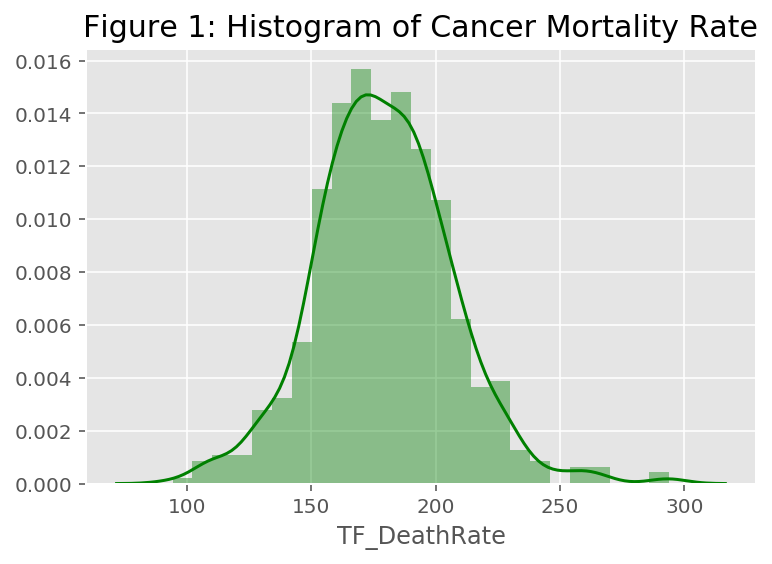

In [19]:
sns.distplot(df['TF_DeathRate'], kde = True, color = 'green').set_title('Figure 1: Histogram of Cancer Mortality Rate', fontsize = 15)
plt.show();

As outliers were removed during Data preparation, it makes sense that Figure 1 is symmetric and unimodal, with a narrow distribution.

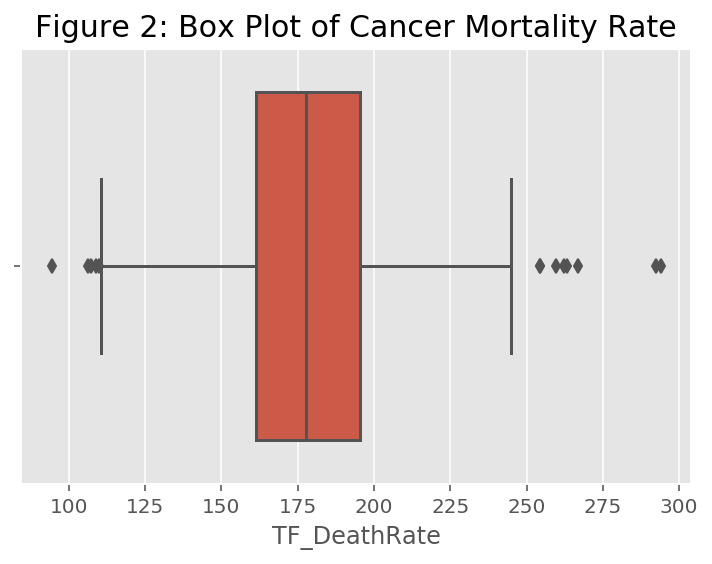

In [20]:
sns.boxplot(df['TF_DeathRate']).set_title('Figure 2: Box Plot of Cancer Mortality Rate', fontsize = 15)
plt.show();

In [21]:
print('Most of the information shown in Figure 2, is summed up as:')
df['TF_DeathRate'].describe().round(3)

Most of the information shown in Figure 2, is summed up as:


count    584.000
mean     179.133
std       27.378
min       94.400
25%      161.375
50%      177.850
75%      195.550
max      293.900
Name: TF_DeathRate, dtype: float64

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Multivariate Visualisation </font></h3>

<font style="color:#0086b3;font-size:20pt;font-family:calibri"> SCATTERPLOT OF NUMERIC FEATURES AND Death Rate </font>

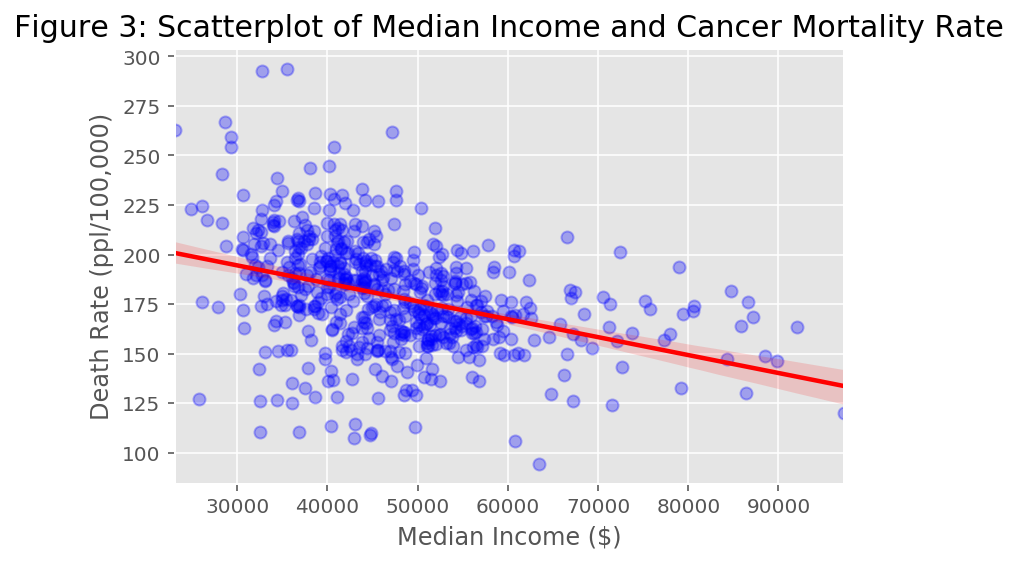

In [22]:
# after each one write relation ship check ch 8 slides

# Dependent Variable goes on x-axis, Independent Variable goes on y-axis,
sns.regplot(df['IncomeMedian'], df['TF_DeathRate'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.title('Figure 3: Scatterplot of Median Income and Cancer Mortality Rate', fontsize = 15)
plt.xlabel('Median Income ($)')
plt.ylabel('Death Rate (ppl/100,000)')
plt.show();

This demonstrates a linearly negative association between target variable(death rate) and median income.

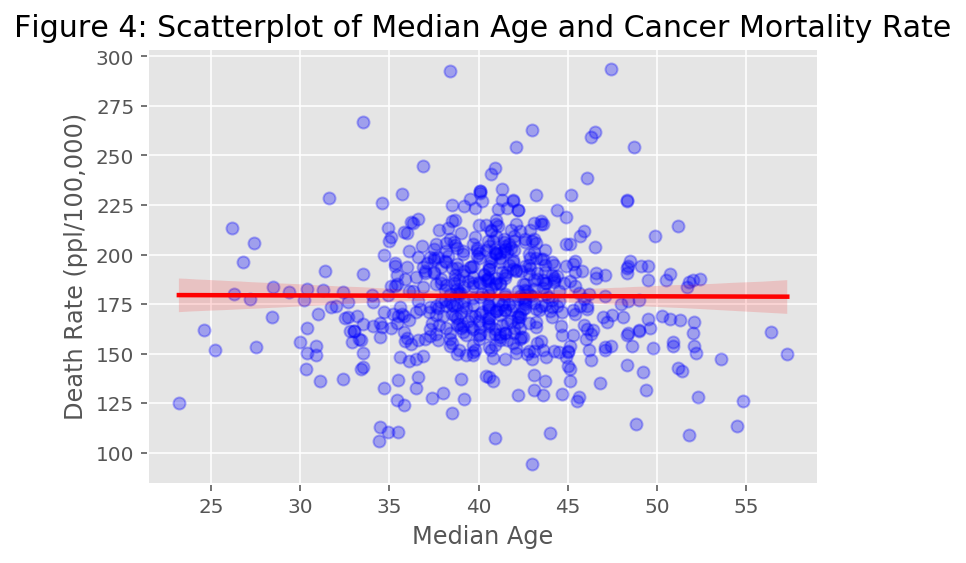

In [23]:
sns.regplot(df['AgeMedian'], df['TF_DeathRate'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.title('Figure 4: Scatterplot of Median Age and Cancer Mortality Rate', fontsize = 15)
plt.xlabel('Median Age')
plt.ylabel('Death Rate (ppl/100,000)')
plt.show();

This supports independence between target variable(death rate) and median income.

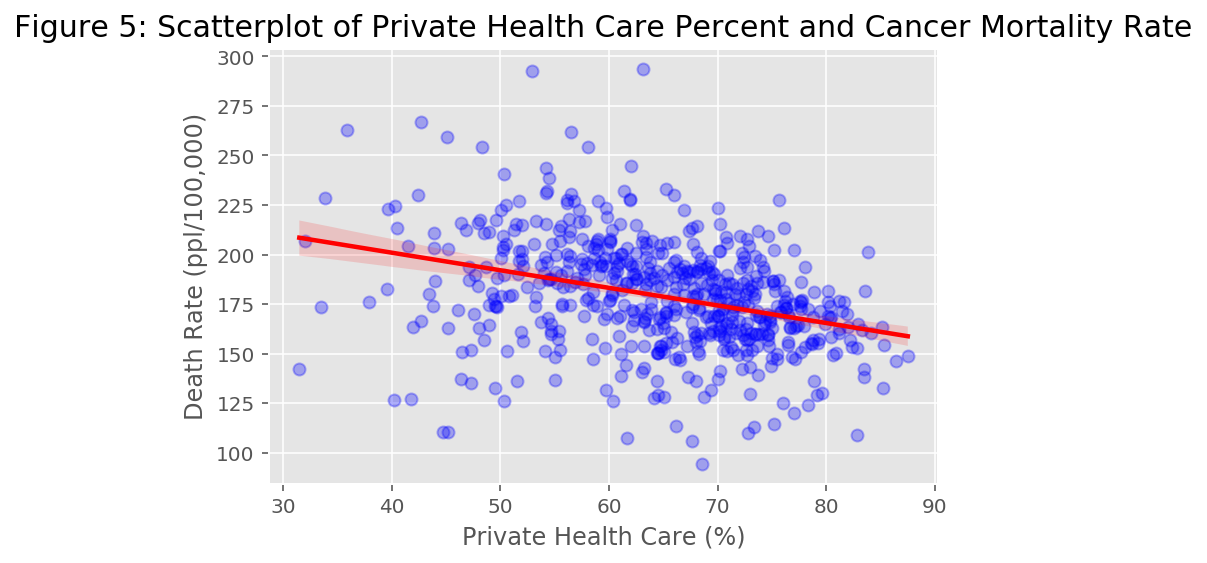

In [24]:
sns.regplot(df['PrivateHealthPercent'], df['TF_DeathRate'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.title('Figure 5: Scatterplot of Private Health Care Percent and Cancer Mortality Rate', fontsize = 15)
plt.xlabel('Private Health Care (%)')
plt.ylabel('Death Rate (ppl/100,000)')
plt.show();

This shows linearly negative association between target variable(death rate) and private health care.

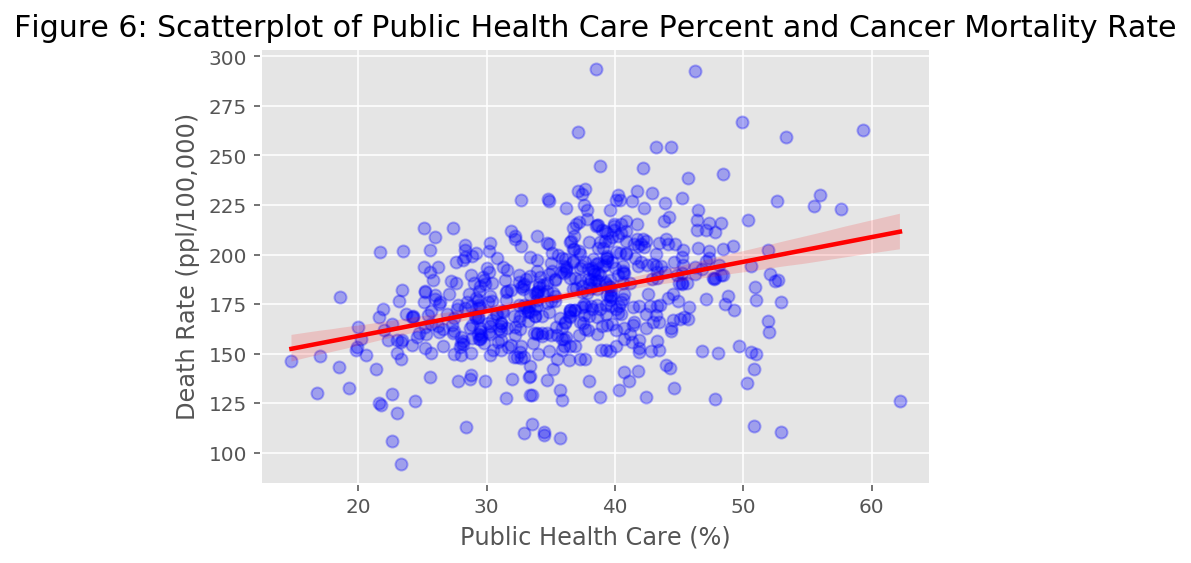

In [25]:
sns.regplot(df['PublicHealthPercent'], df['TF_DeathRate'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.title('Figure 6: Scatterplot of Public Health Care Percent and Cancer Mortality Rate', fontsize = 15)
plt.xlabel('Public Health Care (%)')
plt.ylabel('Death Rate (ppl/100,000)')
plt.show();

This shows linearly positive association between target variable(death rate) and public health care.

 <font style="color:#0086b3;font-size:20pt;font-family:calibri"> HISTOGRAMS OF NUMERIC FEATURES</font>

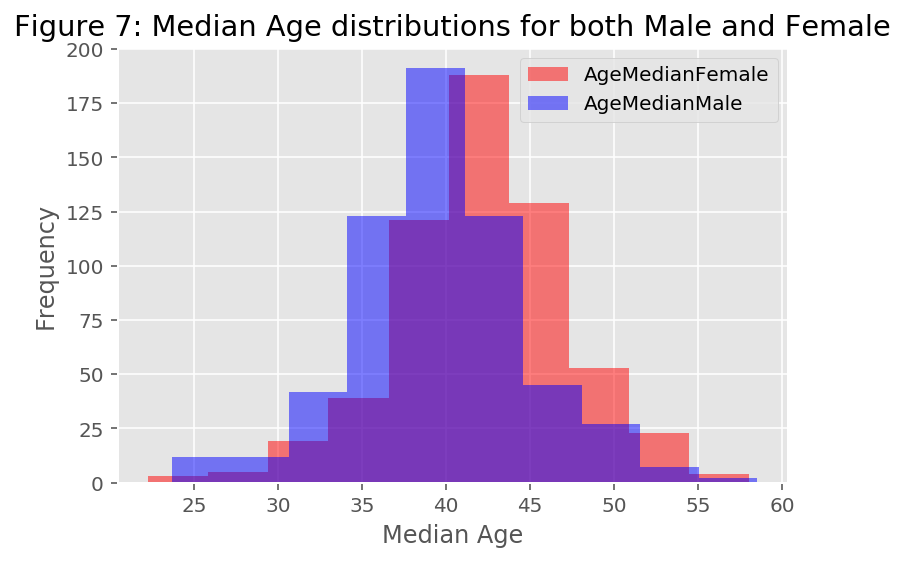

In [26]:
plt.hist(df['AgeMedianFemale'], color = 'r', alpha = 0.5, label = "AgeMedianFemale")
plt.hist(df['AgeMedianMale'], color = 'b', alpha = 0.5, label = "AgeMedianMale")
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.title('Figure 7: Median Age distributions for both Male and Female')
plt.legend()
plt.show();

Median ages for both males and females are fairly similar with a normal distribution, unimodal and symmetric, but have slightly different medians (approximately 39 vs 42).

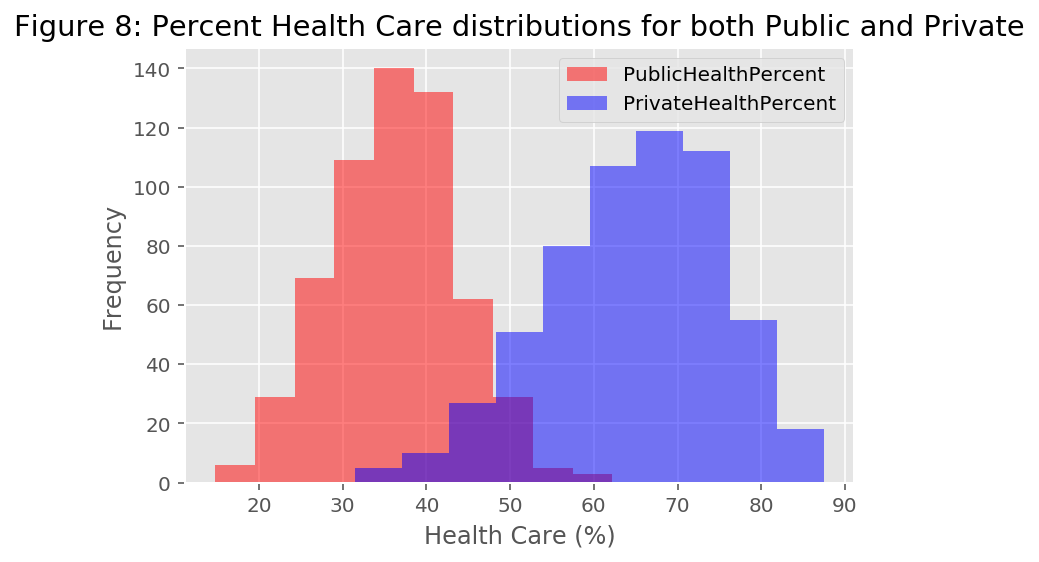

In [27]:
plt.hist(df['PublicHealthPercent'], color = 'r', alpha = 0.5, label = "PublicHealthPercent")
plt.hist(df['PrivateHealthPercent'], color = 'b', alpha = 0.5, label = "PrivateHealthPercent")
plt.xlabel('Health Care (%)')
plt.ylabel('Frequency')
plt.title('Figure 8: Percent Health Care distributions for both Public and Private')
plt.legend()
plt.show();

The normal distribution for private and public health care are very different, with their respective medians being far apart, and private health being right skewed where as public is more symmetric.

<a id="subhead5"></a>
<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Statistical Modeling and Performance Evaluation </font></h2>

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Full Model </font></h3>

The first step is to fit a multiple linear regression, whuch will predic cancer mortality rates using all the other features provided in the dataframe. This is given the term, full model. To refresh our mind, let's look at the clean data.

In [28]:
df.head(5)

,Cases,Deaths,TF_DeathRate,DiagnosedRate,IncomeMedian,Pop2015,PovertyPercent,TrialsTaken,AgeMedian,AgeMedianMale,AgeMedianFemale,HouseholdSizeMean,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PrivateHealthPercent,PrivateHealthPercentAlone,PctEmpPrivCoverage,PublicHealthPercent,PublicHealthPercentAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,173.0,70,161.3,411.6,48127,43269,18.6,23.111,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.229,0.969,2.246,3.741,45.373,4.333
1,427.0,202,194.8,430.4,44243,75882,17.1,342.637,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.745,0.783,1.161,1.363,51.022,4.604
2,57.0,26,144.4,350.1,49955,10321,12.5,0.000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104,0.270,0.666,0.492,54.027,6.797
3,146.0,71,183.6,404.0,40189,20848,17.8,0.000,51.7,50.8,52.5,2.24,52.7,27.3,33.9,36.5,2.2,31.6,11.3,40.9,8.9,55.8,33.1,25.9,50.9,24.1,89.407,0.305,1.889,2.286,48.967,5.889
4,2265.0,901,171.0,440.7,50083,490945,16.3,462.374,37.2,35.7,38.7,2.45,49.4,10.9,29.3,51.2,8.6,25.7,18.1,55.1,8.4,65.2,50.6,42.5,36.5,21.4,89.038,1.827,2.316,1.034,48.188,5.356


In order to create the regression formula, we need to add all the independent features in a formula string with the encoded features. To save time we can use string function trick below.

In [29]:
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head(5)

,Cases,Deaths,TF_DeathRate,DiagnosedRate,IncomeMedian,Pop2015,PovertyPercent,TrialsTaken,AgeMedian,AgeMedianMale,AgeMedianFemale,HouseholdSizeMean,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PrivateHealthPercent,PrivateHealthPercentAlone,PctEmpPrivCoverage,PublicHealthPercent,PublicHealthPercentAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,173.0,70,161.3,411.6,48127,43269,18.6,23.111,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.229,0.969,2.246,3.741,45.373,4.333
1,427.0,202,194.8,430.4,44243,75882,17.1,342.637,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.745,0.783,1.161,1.363,51.022,4.604
2,57.0,26,144.4,350.1,49955,10321,12.5,0.000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104,0.270,0.666,0.492,54.027,6.797
3,146.0,71,183.6,404.0,40189,20848,17.8,0.000,51.7,50.8,52.5,2.24,52.7,27.3,33.9,36.5,2.2,31.6,11.3,40.9,8.9,55.8,33.1,25.9,50.9,24.1,89.407,0.305,1.889,2.286,48.967,5.889
4,2265.0,901,171.0,440.7,50083,490945,16.3,462.374,37.2,35.7,38.7,2.45,49.4,10.9,29.3,51.2,8.6,25.7,18.1,55.1,8.4,65.2,50.6,42.5,36.5,21.4,89.038,1.827,2.316,1.034,48.188,5.356


In [30]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='TF_DeathRate').columns)
formula_string_encoded = 'TF_DeathRate ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  TF_DeathRate ~ Cases + Deaths + DiagnosedRate + IncomeMedian + Pop2015 + PovertyPercent + TrialsTaken + AgeMedian + AgeMedianMale + AgeMedianFemale + HouseholdSizeMean + PercentMarried + PctNoHS18_24 + PctHS18_24 + PctSomeCol18_24 + PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctUnemployed16_Over + PrivateHealthPercent + PrivateHealthPercentAlone + PctEmpPrivCoverage + PublicHealthPercent + PublicHealthPercentAlone + PctWhite + PctBlack + PctAsian + PctOtherRace + PctMarriedHouseholds + BirthRate


To make things more interesting, we can add two interaction terms to our full model. We're adding the interaction of the poverty(percentage) feature with median age and county population in 2015, features respectively.

In [31]:
formula_string_encoded = formula_string_encoded + ' + AgeMedian:PovertyPercent + Pop2015:PovertyPercent'

In addition, to demonstrate how to add higher order terms into our linear regression, we will add the square of the median age feature.

In [32]:
formula_string_encoded = formula_string_encoded + ' + np.power(AgeMedian, 2)'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  TF_DeathRate ~ Cases + Deaths + DiagnosedRate + IncomeMedian + Pop2015 + PovertyPercent + TrialsTaken + AgeMedian + AgeMedianMale + AgeMedianFemale + HouseholdSizeMean + PercentMarried + PctNoHS18_24 + PctHS18_24 + PctSomeCol18_24 + PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctUnemployed16_Over + PrivateHealthPercent + PrivateHealthPercentAlone + PctEmpPrivCoverage + PublicHealthPercent + PublicHealthPercentAlone + PctWhite + PctBlack + PctAsian + PctOtherRace + PctMarriedHouseholds + BirthRate + AgeMedian:PovertyPercent + Pop2015:PovertyPercent + np.power(AgeMedian, 2)


Finally we have constructed our statistical model formula in the form of a string. Now we can implement an OLS (ordinary least squares) model, to our already encoded data. (Aksakalli et al., 2020)

In [33]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())
# (Aksakalli et al., 2020)

                            OLS Regression Results                            
Dep. Variable:           TF_DeathRate   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     15.51
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           5.22e-60
Time:                        18:59:47   Log-Likelihood:                -2564.5
No. Observations:                 584   AIC:                             5199.
Df Residuals:                     549   BIC:                             5352.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

As evident above, the adjusted R-squared value of the full model is 0.458, meaning that the model explains just 45.8% of the variance.  It can be observed that a majority of the p-values are highly significant, although some insignificant variables exist at a 5% level.
<br><br>
Now we we will create a new data frame for the actual death rate vs. predicted death rate and the residuals for the full model. This dataframe will allow us to plot  regression residuals and predicted values.

In [34]:
residuals_full = pd.DataFrame({'actual': data_encoded['TF_DeathRate'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10).round(3)

,actual,predicted,residual
0,161.3,157.996,3.304
1,194.8,185.399,9.401
2,144.4,161.216,-16.816
3,183.6,171.571,12.029
4,171.0,174.855,-3.855
5,169.9,173.042,-3.142
6,153.8,172.123,-18.323
7,189.7,191.618,-1.918
8,185.6,152.008,33.592
9,128.0,160.710,-32.710


Now let us plot actual death rate values vs. predicted death rate values.

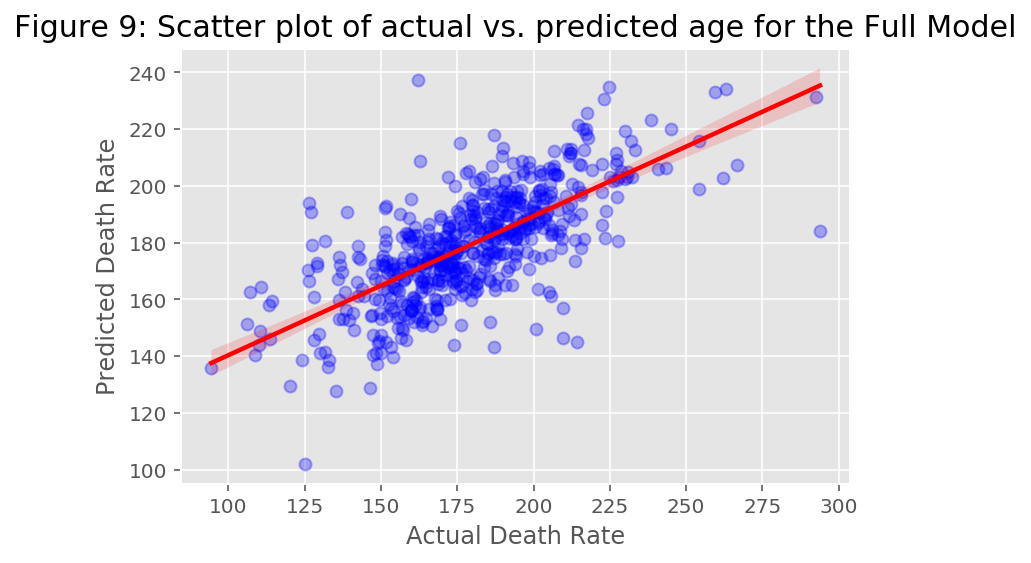

In [35]:
sns.regplot(residuals_full['actual'], residuals_full['predicted'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.xlabel('Actual Death Rate');
plt.ylabel('Predicted Death Rate');
plt.title('Figure 9: Scatter plot of actual vs. predicted age for the Full Model', fontsize=15);
plt.show();

As demonstrated in Figure 9, it is evident that the full model produces a prediction above max death rate and below the min death rate, even though these values do not exist in the data frame. Linearly positive association is shown between the variables. The next step for the full model is to verify the we can verify the diagnostics.

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Full Model Diagnostic Checks</font></h3>

We want to verify if there are signs of rule breaking of the regression assumpions, stated as:
<br>
- there is a linear relationship between the independent and target features
- the errors have constant variance
- the residual distribution has normality
- the residuals are statistical independent
<br>
Now we need to create a scatter plot of the residuals (as a function of predicted death rate).

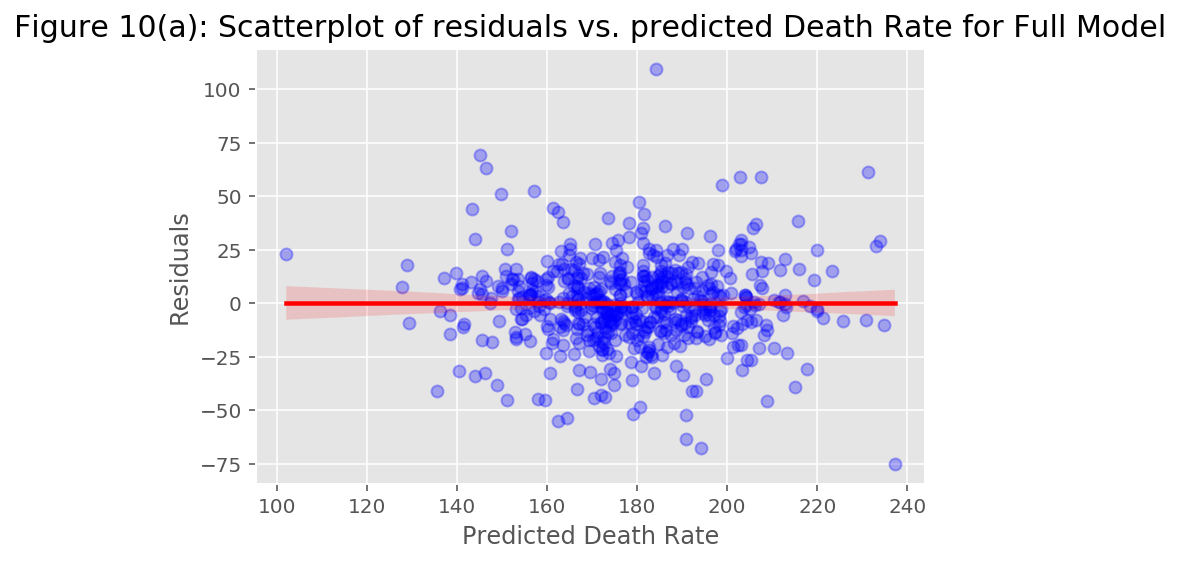

In [36]:
sns.regplot(residuals_full['predicted'], residuals_full['residual'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.xlabel('Predicted Death Rate');
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. predicted Death Rate for Full Model', fontsize=15)
plt.show();

As shown in Figure 10(a), we see that the residuals are mostly random and centered around 0, regardless of predicted death rate. Clustering is especially true for predicted death rates between 150 and 200. 
The constant variability assumption of linear regression, is to a degree satisfied in this case as demonstrated by the random pattern. Linear gradient of approx 0, signifying independence between the variables. Now to plot Actual Death Rate vs. Residuals.

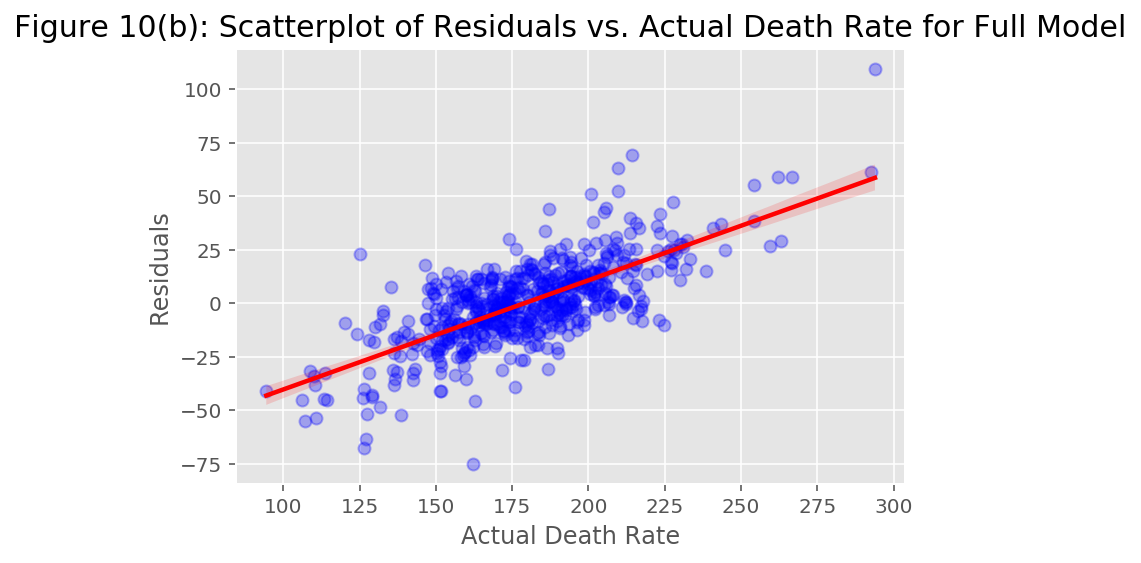

In [37]:
sns.regplot(residuals_full['actual'], residuals_full['residual'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.xlabel('Actual Death Rate');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of Residuals vs. Actual Death Rate for Full Model', fontsize=15)
plt.show();

In Figure 10b, When the Actual death rate is less than 180, the model overestimates dude to negative residuals. 
Around 175 to 200 death rate, the model is relatively accurate due to the residual value hovering around 0.
When the Actual death rate is greater than 200, the model mostly underestimates it due to the positive residuals.
Therefore in conclusion, the model generally overestimates the lower values of Actual death Rates and underestimates the higher values of actual death rates.
Linearly positive association is shown between the variables. It is mostly clustered around the 150 to 215 mark. Now on the same plot, we can overlap the histograms of actual vs. predicted death rate.


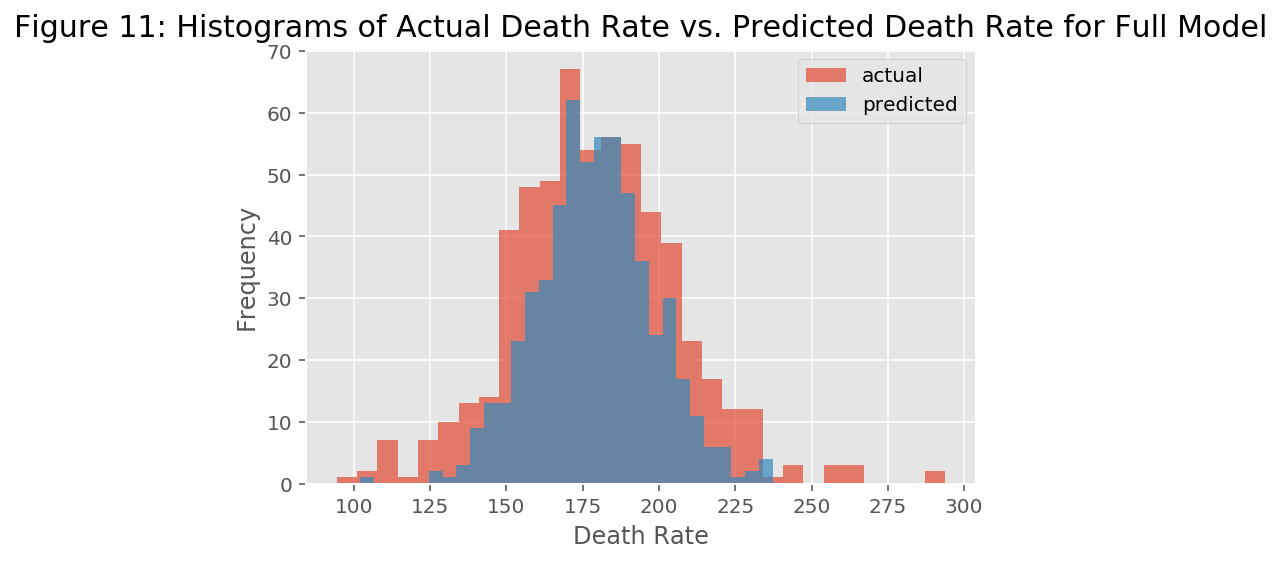

In [38]:
plt.hist(residuals_full['actual'], label='actual', bins=30, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=30, alpha=0.7);
plt.xlabel('Death Rate');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of Actual Death Rate vs. Predicted Death Rate for Full Model', fontsize=15);
plt.legend()
plt.show();

In Figure 11, it is evident that the distribution are substantially different. The predicted model is more clustered around 180, where in reality the distribution is more spreadout. Now, let us have look at the histogram of the residuals.

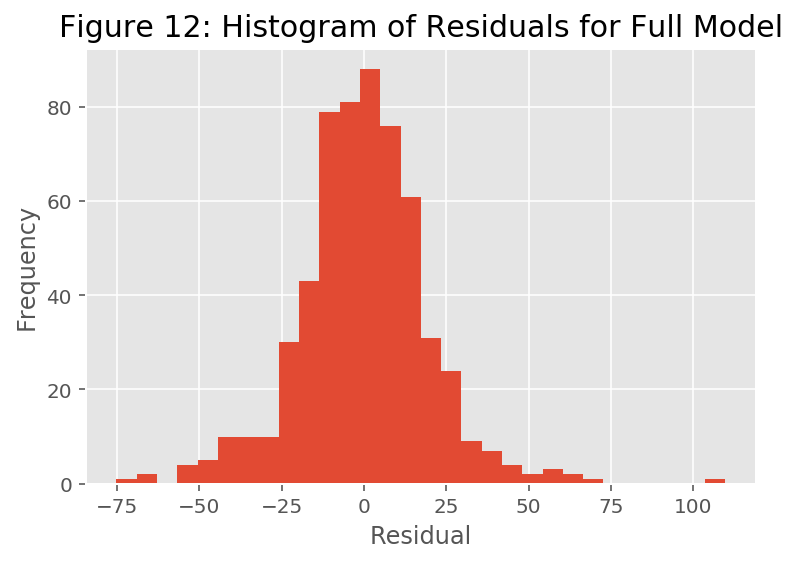

In [39]:
plt.hist(residuals_full['residual'], bins = 30);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12: Histogram of Residuals for Full Model', fontsize=15);
plt.show();

In Figure 12, we can see that the histogram of residuals looks substantially symmetric, unimodal and centered around 0. All in all, its apparent that there is no significant violation of the normality assumption in this case.

<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Backwards Feature Selection </font></h3>

Now, using p-values, we can construct the backwards feature selection. We need to write out own code as Statsmodel does not have any automatic feature slection. (Aksakalli et al., 2020)

In [40]:
# (Aksakalli et al., 2020)

## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")

# (Aksakalli et al., 2020)


Performing backwards feature selection using p-values:

Removing term "PctAsian" with p-value 0.9663

Removing term "Pop2015" with p-value 0.9707

Removing term "Pop2015:PovertyPercent" with p-value 0.7976

Removing term "PrivateHealthPercent" with p-value 0.7819

Removing term "TrialsTaken" with p-value 0.7398

Removing term "HouseholdSizeMean" with p-value 0.6659

Removing term "np.power(AgeMedian, 2)" with p-value 0.5192

Removing term "BirthRate" with p-value 0.441

Removing term "AgeMedian" with p-value 0.3646

Removing term "AgeMedianFemale" with p-value 0.8225

Removing term "IncomeMedian" with p-value 0.3466

Removing term "PctWhite" with p-value 0.4562

Removing term "Deaths" with p-value 0.2758

Removing term "Cases" with p-value 0.7894

Removing term "PctHS18_24" with p-value 0.1938

Removing term "PctSomeCol18_24" with p-value 0.7111

Removing term "PctBlack" with p-value 0.137

Removing term "PrivateHealthPercentAlone" with p-value 0.1402

Removing term "PctEmpPrivCoverag

Now we need to construct another dataframe of actual death rate vs. predicted death rate for the reduced model. It will be conducted in a similar manner to the full model. 

In [41]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['TF_DeathRate'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_reduced.head(10).round(3)

,actual,predicted,residual
0,161.3,157.996,3.304
1,194.8,185.399,9.401
2,144.4,161.216,-16.816
3,183.6,171.571,12.029
4,171.0,174.855,-3.855
5,169.9,173.042,-3.142
6,153.8,172.123,-18.323
7,189.7,191.618,-1.918
8,185.6,152.008,33.592
9,128.0,160.710,-32.710


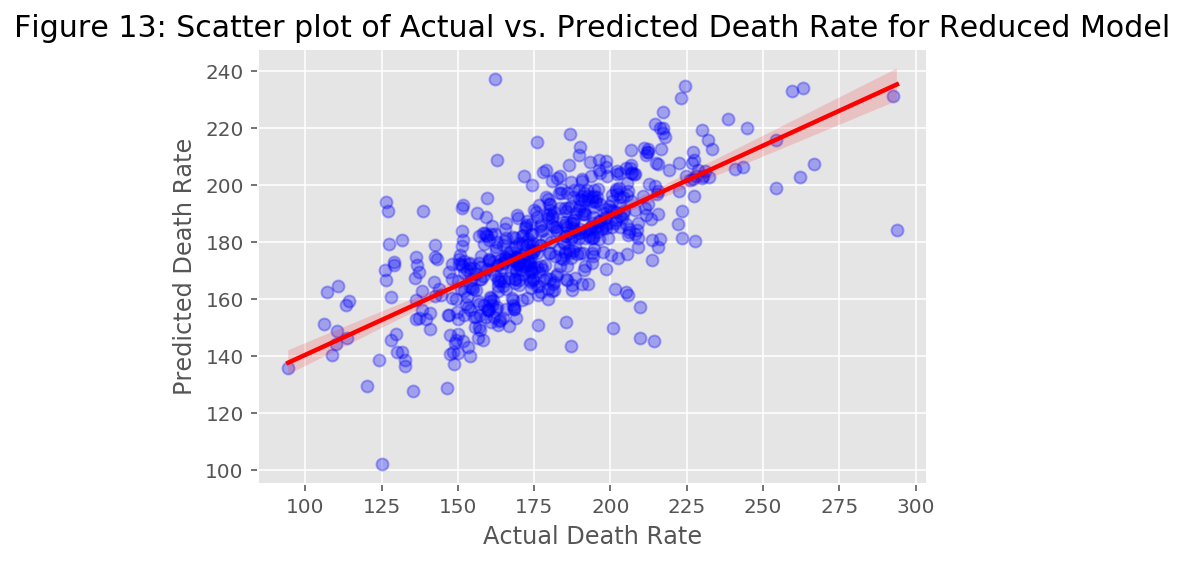

In [42]:
sns.regplot(residuals_reduced['actual'], residuals_reduced['predicted'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.xlabel('Actual Death Rate');
plt.ylabel('Predicted Death Rate');
plt.title('Figure 13: Scatter plot of Actual vs. Predicted Death Rate for Reduced Model', fontsize=15);
plt.show(); 

The model gives an Adjusted R-squared value of 0.464, which means the reduced model can only explain 46.4% of the variance. This is done with 19 less variables, which is a lot, leaving 16 variables for the reduced model. As expected, the p-values are all significant at the 5% level. From Figure 13, we continue to have the same problems as before with our model. This means that the reduced model overestimates smaller death rates and underestimates larger death rates. Linearly positive association is shown between the variables. Now for the reduced model, we can construct diagnostic checks.


<h3><font style="color:#0086b3;font-size:20pt;font-family:calibri"> Reduced Model Diagnostic Checks </font></h3>

The first step is to create a scatter plot of residuals (as a function of predicted death rate).

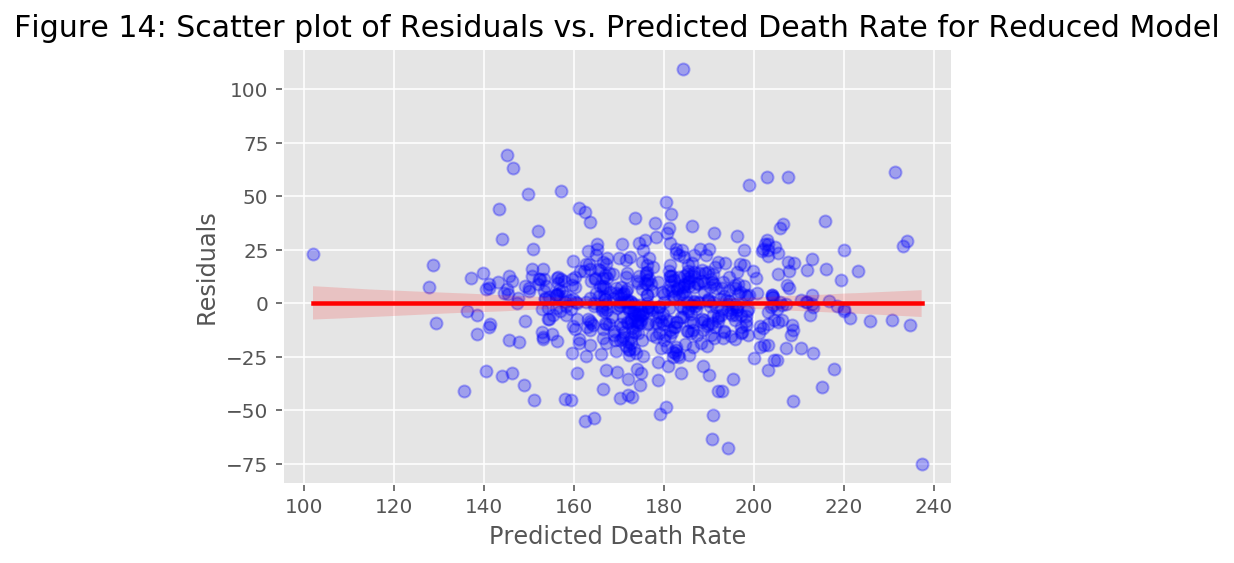

In [43]:
#plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
sns.regplot(residuals_reduced['predicted'], residuals_reduced['residual'], scatter_kws={"color": "blue",'alpha':0.3}, line_kws={"color": "red"})
plt.xlabel('Predicted Death Rate');
plt.ylabel('Residuals')
plt.title('Figure 14: Scatter plot of Residuals vs. Predicted Death Rate for Reduced Model', fontsize=15)
plt.show();

Since Figure 14 looks almost identical to Figure 10(a), it means that the residuals exhibit the same randomly clustered pattern, and independence is shown in scatterplot. Now for the reduced model, we can see the histogram of the residuals.

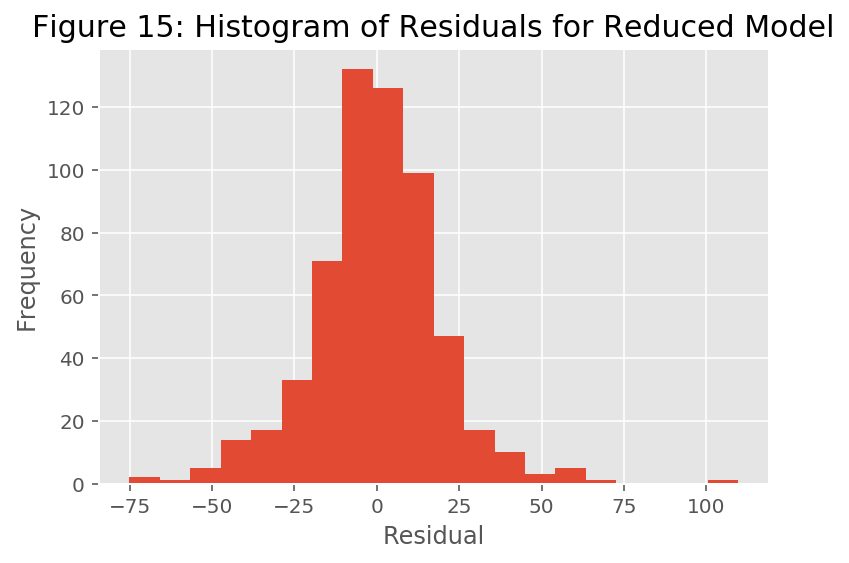

In [44]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of Residuals for Reduced Model', fontsize = 15)
plt.show();

In Figure 15, we can see there is again a quite symmetric, unimodal histogram centered around zero. This signifies that there is a normal distribution of the residuals.

<a id="subhead6"></a>
<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> Summary and Conclusion </font></h2>

Our objectives helped us achieve our goal of determining if we can predict the cancer mortality rate of a US county, using multiple linear regression primarily with just main affects, although it was within a larger margin of error than desired.

Using our independent variables, we were able to get a full model with an Adjusted R-squared value of 45.8%. After backwards variable selection with a p-value cutoff value of 0.05, we were able to increase performance slightly nat 46.4% but with 19 less variables, which is too many. Our final model has 16 variables all together with a model p-value of 0. 

Diagnostic checks with residual scatter plots indicate that, the residual are generally random and centered around 0. This pattern indicates that the constant variability assumption of linear regression is generally satisfied in this case. In addition, the residual histograms suggest that there are no significant violations of the normality assumption on the residuals. 

The final multiple linear regression model has an Adjusted R-squared value of 46.4%, which is moderately low (low being considered  30 to 50% and moderate > 50%). Therefore, it appears that the variables we used are not quite adequate for accurately predicting the death rate of a US county in the 'OLS Regression Challenge' dataframe within a multiple linear regression framework. 

For the future, in order to try and improve the he Adjusted R-squared value, it would be appropriate to include some more interaction variables and possibly some higher order variables. Even then, it is possible that the current liner regression model is inaccurate, and a nonlinear model is more fitting, examples including neural networks.

Our regression model proves to be valuable in correctly predicting deaths per 100,000 people of a US County, within  ±60  deaths, generally speaking which is too high to be useful. Unfortunately, this margin of error is too large for the model to have any use in practical situations. In addition the model has substnatial flaws. Our model persistently overestimates smaller death rates and underestimates larger death rates. 

Our objectives helped us achieve our goal of determining that we can predict the cancer mortality rate of a US county within an acceptable margin of error, using multiple linear regression primarily with just main affects, although it was within a large margin of error.

Using our independent variables, we were able to get a full model with an Adjusted R-squared value of 45.8%. After backwards variable selection with a p-value cutoff value of 0.05, we were able to maintain an almost identical performance at 46.4% but with 19 less variables which is significant. Our final model has 16 variables in total with a model p-value of 0. 

Diagnostic checks with residual scatter plots indicate that the residual are generally random and centered around 0. This pattern indicates that the constant variability assumption of linear regression is genrally  satisfied in this case. In addition, the residual histograms suggest that there are no significant violations of the normality assumption on the residuals. 

<h2><font style="color:#0086b3;font-size:25pt;font-family:calibri"> References </font></h2>

Aksakalli, V. et al.(2020). Regression Case Study | www.featureranking.com. www.featureranking.com. Retrieved 22 October 2020, from https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/.

Rippner, N. (2020). OLS Regression Challenge - dataset by nrippner. Data.world. Retrieved 24 October 2020, from https://data.world/nrippner/ols-regression-challenge.